In [1]:
#hmm
states=['c','i']
observation =[ 'c','i','l']
obs_seq=['lem','ice','cola']

In [2]:
import numpy as np

In [3]:
start_prob={'c':1, 'i':0}
tran_prob={
    'c':{'c':0.7,'i':0.3},
    'i':{'c':0.5,'i':0.5}
}
emission_prob={
    'c':{'cola':0.6,'ice':0.1,'lem':0.3},
    'i':{'cola':0.1,'ice':0.7,'lem':0.2},
    
}

In [4]:
def forward(obs_seq):
    fwd=[{}]
    for state in states:
        fwd[0][state] = start_prob[state]*emission_prob[state][obs_seq[0]]
    for t in range(1,len(obs_seq)):
        fwd.append({})
        for state in states:
            fwd[t][state]=sum(fwd[t-1][prev_state]*trans_prob[prev_state][state]
                              *emission_prob[state][obs_seq[t]] for prev_state in states)
    return fwd

In [5]:
def backward(obs_seq):
    bwd=[{} for _ in range(len(obs_seq))]
    for state in states:
        bwd[-1][state]=1
    for t in range(len(obs_seq)-2,-1,-1):
        bwd[t]={}
        for state in states:
            bwd[t][states]= sum(bwd[t+1][next_state]*trans_prob[state][next_state]
                                *emission_prob[next_state][obs_seq[t+1]] for next_state in states)
    return bwd        

In [6]:
fwd = forward(obs_seq)
bwd = backward(obs_seq)

print("Forward Probabilities:")
for t in range(len(fwd)):
    print(fwd[t])
print("\nBackward Probabilities:")
for t in range(len(bwd)):
    print(bwd[t])

NameError: name 'trans_prob' is not defined

In [7]:
#ann classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import roc_curve,roc_auc_score,confusion_matrix,classification_report


In [8]:
data= pd.read_csv('E:\ml\Churn_Modelling.csv')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
#x has categorical value so use label encoder to concert into numerical
label_encoder=LabelEncoder()
x['Gender']=label_encoder.fit_transform(x['Gender'])
x['Geography']=label_encoder.fit_transform(x['Geography'])
x['Surname']=label_encoder.fit_transform(x['Surname'])

In [ ]:
x['Gender'].head()

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [16]:
#after splitting ,do scaling
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [17]:
#classification model
model= Sequential([
    Dense(64,activation='relu',input_shape=(x_train.shape[1],)),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
    
])

C:\Users\hmani\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
#compile
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
#train
history= model.fit(x_train,y_train,epochs=100,batch_size=32,verbose=1,validation_data=(x_test,y_test))

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8028 - loss: 0.4806 - val_accuracy: 0.8370 - val_loss: 0.3900
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8390 - loss: 0.3967 - val_accuracy: 0.8590 - val_loss: 0.3585
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8576 - loss: 0.3542 - val_accuracy: 0.8595 - val_loss: 0.3563
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8530 - loss: 0.3524 - val_accuracy: 0.8615 - val_loss: 0.3510
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8599 - loss: 0.3436 - val_accuracy: 0.8580 - val_loss: 0.3519
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8610 - loss: 0.3314 - val_accuracy: 0.8565 - val_loss: 0.3525
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8511 - loss: 0.3534 - val_accuracy: 0.8595 - val_loss: 0.3505
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8681 - loss: 0.3246 - val_accu

In [21]:
#evaluate the model
loss,accuracy= model.evaluate(x_test,y_test)
print("Loss: ",loss)
print("Accuracy: ",accuracy)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8183 - loss: 0.5423
Loss:  0.5631827116012573
Accuracy:  0.8180000185966492


In [22]:
#roc curve
y_pred=model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


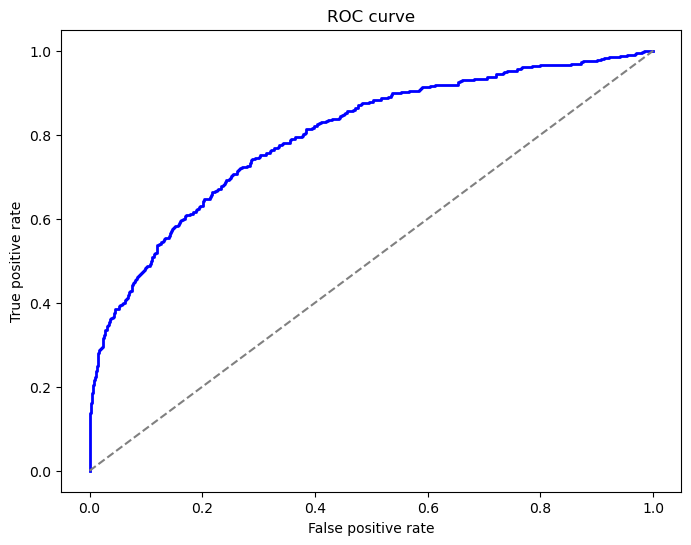

In [23]:
fpr,tpr,thresholds =roc_curve(y_test,y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='blue',lw=2)
plt.plot([0,1],[0,1],color='gray',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [26]:
#auc score
auc_score=roc_auc_score(y_test,y_pred)
print('AUC score',auc_score)

AUC score 0.7992276158220002


In [27]:
# Generate confusion matrix
y_pred = np.round(y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1445  162]
 [ 202  191]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1607
           1       0.54      0.49      0.51       393

    accuracy                           0.82      2000
   macro avg       0.71      0.69      0.70      2000
weighted avg       0.81      0.82      0.81      2000



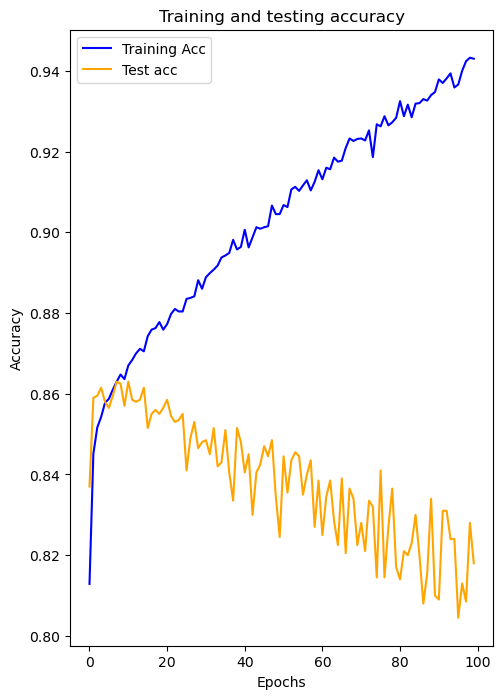

In [31]:
#plotting training and testing acc
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'],label='Training Acc',color='blue')
plt.plot(history.history['val_accuracy'],label='Test acc',color='orange')
plt.title('Training and testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [32]:
#regression model
reg_model=Sequential([
    Dense(64,activation='relu',input_shape=[x_train.shape[1]]),
    Dense(64,activation='relu'),
    Dense(1)
])

C:\Users\hmani\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
#regression model - mean squared error L1
reg_model.compile(optimizer='adam',loss='mean_squared_error')

In [35]:
history=reg_model.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_test,y_test),verbose=1)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1589 - val_loss: 0.1234
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1184 - val_loss: 0.1202
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1144 - val_loss: 0.1181
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1063 - val_loss: 0.1159
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1018 - val_loss: 0.1193
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1044 - val_loss: 0.1173
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1028 - val_loss: 0.1147
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0950 - val_loss: 0.1184
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1020 - val_loss: 0.1145
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0956 - val_loss: 0.1129
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0974 - val_loss: 0.1147
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [36]:
#evaluate model on training set
train_loss=reg_model.evaluate(x_train,y_train)
print('training loss: ',train_loss)

test_loss=reg_model.evaluate(x_test,y_test)
print('testing loss: ',test_loss)


250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0434
training loss:  0.04390767589211464
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1481
testing loss:  0.15689393877983093


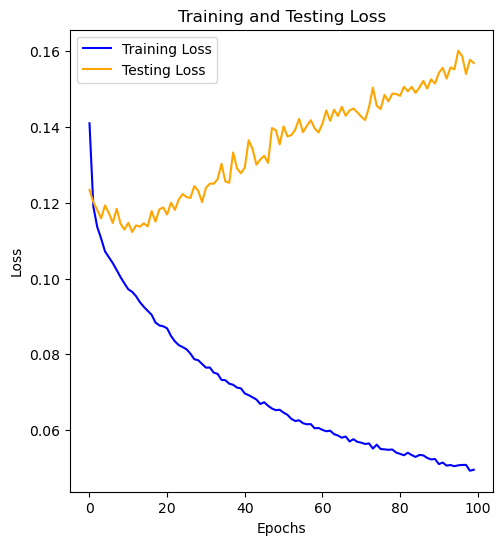

In [37]:
plt.figure(figsize=(12, 6))
# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
#same for L1 error -mean absolute error 
#in compile line loss='mean_absolute_error'

In [98]:
#SVM
df=pd.read_csv("E:/pulsar_stars.csv")

In [99]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [100]:
x=df.drop(columns=["target_class"])
y=df["target_class"]

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [102]:
print(y_train)

5538     0
17529    1
834      0
4467     1
15220    0
        ..
9225     1
13123    0
9845     0
10799    0
2732     0
Name: target_class, Length: 13423, dtype: int64


In [103]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [104]:
from sklearn.svm import SVC
model=SVC(kernel='rbf',random_state=0,probability=True)

In [106]:
df.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [107]:
model.fit(x_train,y_train)

SVC(probability=True, random_state=0)

In [109]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve


In [114]:
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
cf=confusion_matrix(y_test,y_pred)
clreport=classification_report(y_test,y_pred)

In [115]:
print(acc)
print(cf)
print(clreport)

0.9810055865921787
[[4093   22]
 [  63  297]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4115
           1       0.93      0.82      0.87       360

    accuracy                           0.98      4475
   macro avg       0.96      0.91      0.93      4475
weighted avg       0.98      0.98      0.98      4475



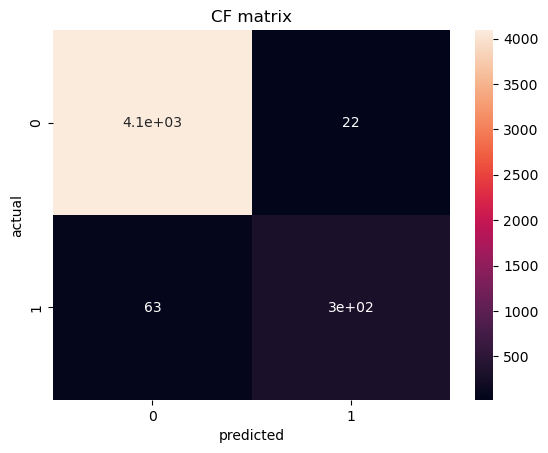

In [116]:
#confusion matrix heatmap
import seaborn as sns
sns.heatmap(cf,annot=True)
plt.title('CF matrix')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

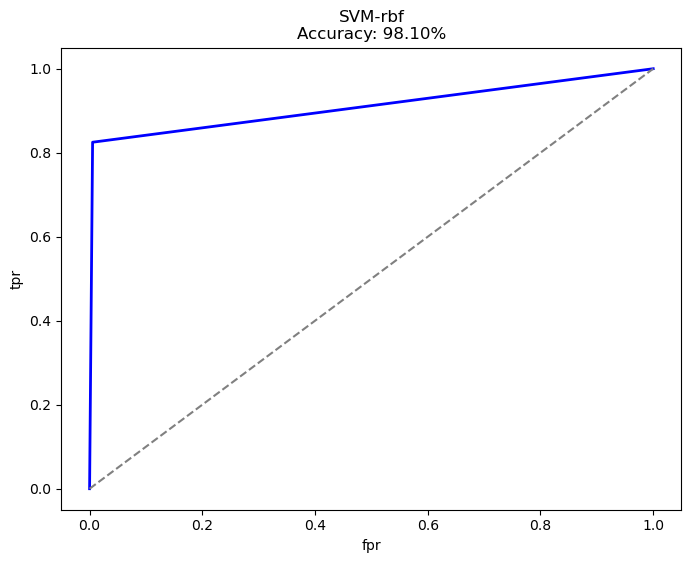

In [119]:
#roc curve
from sklearn.metrics import roc_curve,auc
fpr,tpr,_ =roc_curve(y_test,y_pred) #underscore is given 
#so that it doesnt give too many values to unpack together

plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='blue',lw=2)
plt.plot([0,1],[0,1],color='gray',linestyle='--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('SVM-rbf\nAccuracy: {:.2f}%'.format(acc*100))
plt.show()

In [2]:
#pca
import pandas as pd
import numpy as np
df=pd.read_csv("E:/Pizza.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   brand   300 non-null    object 
 1   id      300 non-null    int64  
 2   mois    300 non-null    float64
 3   prot    300 non-null    float64
 4   fat     300 non-null    float64
 5   ash     300 non-null    float64
 6   sodium  300 non-null    float64
 7   carb    300 non-null    float64
 8   cal     300 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 21.2+ KB


In [4]:
df.shape

(300, 9)

In [5]:
df.notnull()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
295,True,True,True,True,True,True,True,True,True
296,True,True,True,True,True,True,True,True,True
297,True,True,True,True,True,True,True,True,True
298,True,True,True,True,True,True,True,True,True


In [6]:
df.head()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


In [7]:
df=df.drop(columns=["brand"])

In [8]:
df.head()

,id,mois,prot,fat,ash,sodium,carb,cal
0,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


In [9]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled_df=sc.fit_transform(df)

In [11]:
scaled_df

array([[-0.97421164, -1.37181459,  1.25418127, ...,  2.97668662,
        -1.22751105,  2.68012924],
       [-0.97651337, -1.30156227,  1.22771661, ...,  3.03077869,
        -1.21362189,  2.53473344],
       [-0.98054139, -1.31624186,  1.03000998, ...,  2.59804213,
        -1.22584435,  2.71243942],
       ...,
       [ 1.89863118,  0.3823963 , -0.36794707, ..., -0.07951534,
         0.1730719 , -0.56704362],
       [-0.97780809,  0.70220164, -0.45823828, ..., -0.29588362,
         0.08918137, -0.82552504],
       [-0.97766423,  0.62251244, -0.53918903, ..., -0.26883759,
         0.14529358, -0.7447496 ]])

In [17]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(scaled_df)

PCA(n_components=2)

In [18]:
x_pca=pca.transform(scaled_df)

In [19]:
print(x_pca.shape)
print(scaled_df.shape)
#dimensions reduced

(300, 2)
(300, 8)


In [21]:
#knn
df=pd.read_csv("E:\diabetes.csv")

In [22]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
x=df.drop(columns=["Outcome"])
y=df["Outcome"]

In [25]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(xtrain)
xtrain=scaler.transform(xtrain)
xtest=scaler.transform(xtest)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=15)
classifier.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=15)

In [29]:
y_pred=classifier.predict(xtest)

In [30]:
df.shape

(768, 9)

In [33]:
best_k=0
best_score=0
for i in range(2,20,2):
    knn= KNeighborsClassifier(n_neighbors=i,metric='jaccard')
    knn.fit(xtrain,ytrain)
    if knn.score(xtest,ytest)>= best_score:
        best_score=knn.score(xtrain,ytrain)
        best_k=i
        
print("Best k value: {}".format(best_k))

Best k value: 18


In [34]:
clf=KNeighborsClassifier(n_neighbors=18)

In [35]:
clf.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=18)

In [36]:
ypred=clf.predict(xtest)

In [37]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(ytest,ypred)
acc=(ac*100)
print(acc)

81.16883116883116


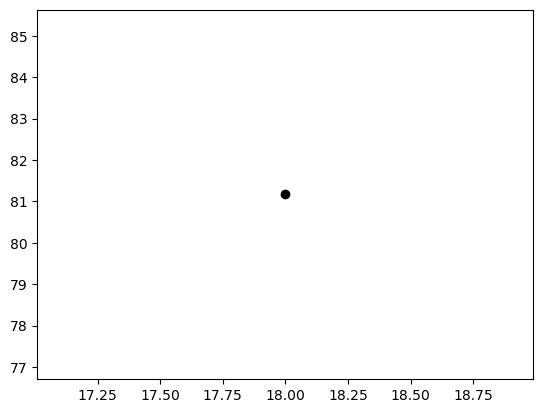

In [40]:
import matplotlib.pyplot as plt
plt.scatter(best_k,acc,color='k')
plt.show()

ValueError: x and y must be the same size

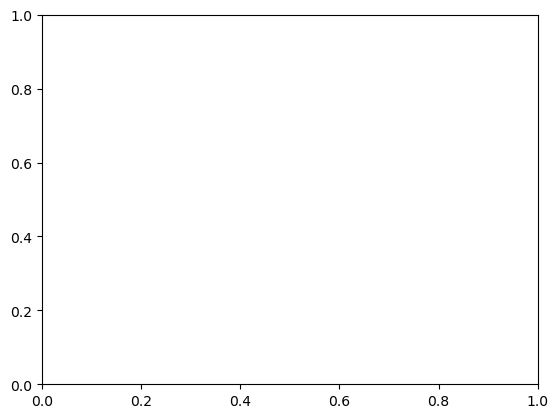

In [41]:
plt.scatter(xtest,ytest,color='b')
plt.plot(xtest,ypred,color='k')
plt.show()

In [42]:
xtest.shape

(154, 8)

In [43]:
ytest.shape

(154,)